# Data Cleaning and Processing 

The process of data cleaning and processing is included in the source codes in cleaning_and_eda. The preprocess added the following new features: 

- Goal: given shoot was a goal. 
- Header: control or shoot balls using head. 
- Counter Attack: a counter attack. 
- Blocked: shoot was blocked. 
- Right Foot: using right foot. 
- First Half: was in first half of the match. 
- X: X coordinate of the shoot. 
- Y: Y coordinate of the shoot. 
- C: distance in Y direction from the goal. 
- strong foot: Given shoot was executed by the player's strong foot or not.  
- Distance: distance of the shoot. 
- angle_degrees: angle of the shoot converted to degrees. 


In [1]:
from cleaning_and_eda import * 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = process_dataset("data")
players = read_process_players("data")

# Data Analytics

Analyze given datasets, analyze team and player performance in given events. 

**Top 10 players** 

Analyze top 10 players based on the number of goals they attemped and the accuracy (the percentage of successful goals) of their attempts. Here, top 10 players are players with highest number of goals, not highest number of attempts. 

In [98]:
top50 = dataset.groupby("wyId").sum().sort_values("Goal", ascending = False)[0:50]
top50_accuracy = dataset.groupby("wyId").mean()["Goal"]
top50_attempts = dataset.groupby("wyId").count()["Goal"]

top50 = players.merge(top50, on = "wyId", how = "right")

top50["Accuracy"] = top50.apply(lambda x: top50_accuracy[x["wyId"]], axis = 1)
top50["Attempts"] = top50.apply(lambda x: top50_attempts[x["wyId"]], axis = 1)
top50[["shortName", "Attempts", "Goal", "Accuracy"]].head()

,shortName,Attempts,Goal,Accuracy
0,Mohamed Salah,141,32,0.226950
1,H. Kane,183,30,0.163934
2,Cristiano Ronaldo,196,28,0.142857
3,L. Messi,154,27,0.175325
4,E. Cavani,107,27,0.252336


Visualize the number of attempts, goals and accuracy of top 10 players. The x axis represents number of goals, the y axis represents the accuracy, the size of the dot represents number of attempts. 

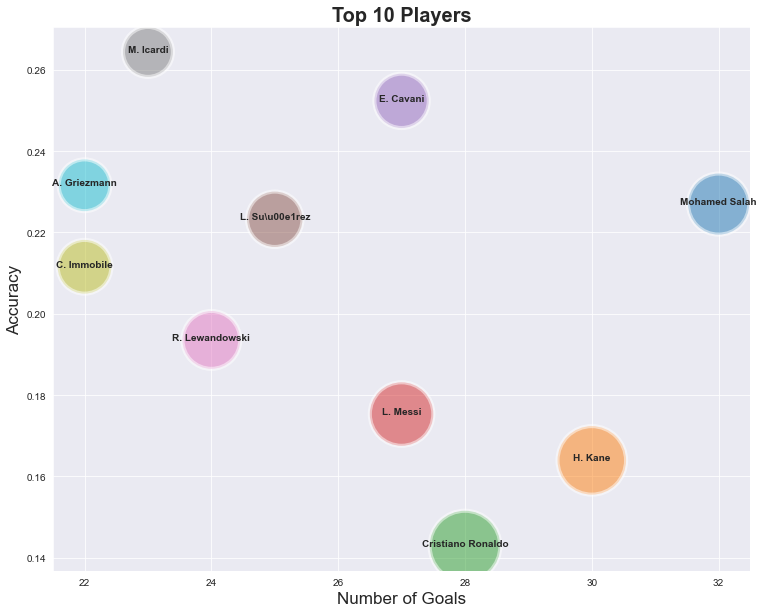

In [108]:
plt.figure(figsize = (12.5, 10))
sns.set_style("darkgrid")
scatterplayers = sns.scatterplot(data = top50[0:10], x = "Goal", y = "Accuracy", size = "Attempts", sizes = (2500, 5000), hue = "shortName", alpha = 0.5, legend = False)

plt.title("Top 10 Players", weight = "bold", fontsize = 20)

plt.xlabel("Number of Goals", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)

for i, label in enumerate(top50[0:10]["shortName"]): 
    plt.text(top50[0:10]["Goal"].iloc[i], top50[0:10]["Accuracy"].iloc[i], label, ha = "center", weight = "semibold")

**Top 10 Teams** 

Analyze top 10 teams based on the number of goals they attemped and the accuracy (the percentage of successful goals) of their attempts. Here, top 10 teams are players with highest number of goals, not highest number of attempts.

In [118]:
teams = pd.read_json("data/teams.json")
teams = teams.rename({"wyId": "teamId"}, axis = 1)
teams.head()

,city,name,teamId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [121]:
top50 = dataset.groupby("teamId").sum().sort_values("Goal", ascending = False)[0:50]
top50_accuracy = dataset.groupby("teamId").mean()["Goal"]
top50_attempts = dataset.groupby("teamId").count()["Goal"]

top50 = teams.merge(top50, on = "teamId", how = "right")

top50["Accuracy"] = top50.apply(lambda x: top50_accuracy[x["teamId"]], axis = 1)
top50["Attempts"] = top50.apply(lambda x: top50_attempts[x["teamId"]], axis = 1)
top50[["name", "Attempts", "Goal", "Accuracy"]].head()

,name,Attempts,Goal,Accuracy
0,Manchester City,603,94,0.155887
1,PSG,558,90,0.161290
2,Barcelona,502,87,0.173307
3,Bayern M\u00fcnchen,535,83,0.155140
4,Real Madrid,631,81,0.128368


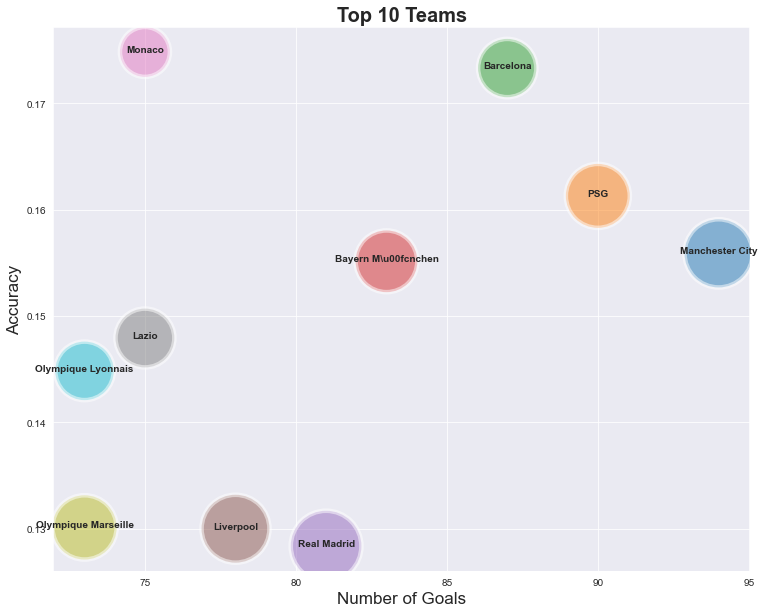

In [123]:
plt.figure(figsize = (12.5, 10))
sns.set_style("darkgrid")
scatterplayers = sns.scatterplot(data = top50[0:10], x = "Goal", y = "Accuracy", size = "Attempts", sizes = (2500, 5000), hue = "name", alpha = 0.5, legend = False)

plt.title("Top 10 Teams", weight = "bold", fontsize = 20)

plt.xlabel("Number of Goals", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)

for i, label in enumerate(top50[0:10]["name"]): 
    plt.text(top50[0:10]["Goal"].iloc[i], top50[0:10]["Accuracy"].iloc[i], label, ha = "center", weight = "semibold")